In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


## sample training and validation images

In [4]:

data_dir = '../dataset'  # Replace with the actual dataset path

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Split data into training and validation sets
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 3376 images belonging to 2 classes.
Found 843 images belonging to 2 classes.


## densemodel



In [6]:

base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## training over 10 epochs


In [8]:

epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


105/105 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.8401 - loss: 0.5268 - val_accuracy: 0.8606 - val_loss: 0.3941
Epoch 2/10
  1/105 ━━━━━━━━━━━━━━━━━━━━ 3:37 2s/step - accuracy: 0.8750 - loss: 0.2023

2024-06-11 22:41:52.999030: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8750 - loss: 0.2023 - val_accuracy: 0.9091 - val_loss: 0.0938
Epoch 3/10


2024-06-11 22:41:53.756321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 304s 3s/step - accuracy: 0.9612 - loss: 0.1035 - val_accuracy: 0.8990 - val_loss: 0.2575
Epoch 4/10
  1/105 ━━━━━━━━━━━━━━━━━━━━ 3:30 2s/step - accuracy: 1.0000 - loss: 0.0512

2024-06-11 22:46:59.527539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0512 - val_accuracy: 0.9091 - val_loss: 0.3229
Epoch 5/10


2024-06-11 22:47:00.268790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.9663 - loss: 0.0867 - val_accuracy: 0.9038 - val_loss: 0.3045
Epoch 6/10
  1/105 ━━━━━━━━━━━━━━━━━━━━ 3:47 2s/step - accuracy: 1.0000 - loss: 0.0331

2024-06-11 22:52:20.191881: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 1.0000 - loss: 0.0331 - val_accuracy: 0.8182 - val_loss: 0.4984
Epoch 7/10


2024-06-11 22:52:20.962781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.9775 - loss: 0.0661 - val_accuracy: 0.9062 - val_loss: 0.3750
Epoch 8/10
  1/105 ━━━━━━━━━━━━━━━━━━━━ 3:47 2s/step - accuracy: 0.9688 - loss: 0.0541

2024-06-11 22:57:37.706730: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9688 - loss: 0.0541 - val_accuracy: 0.9091 - val_loss: 0.1355
Epoch 9/10


2024-06-11 22:57:38.478148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 317s 3s/step - accuracy: 0.9744 - loss: 0.0707 - val_accuracy: 0.9207 - val_loss: 0.2508
Epoch 10/10
  1/105 ━━━━━━━━━━━━━━━━━━━━ 3:50 2s/step - accuracy: 0.9688 - loss: 0.0413

2024-06-11 23:02:57.364352: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9688 - loss: 0.0413 - val_accuracy: 1.0000 - val_loss: 0.0332


2024-06-11 23:02:58.125378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


## evaluation and validation


27/27 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9241 - loss: 0.2280
Validation Loss: 0.24882280826568604
Validation Accuracy: 0.9110320210456848


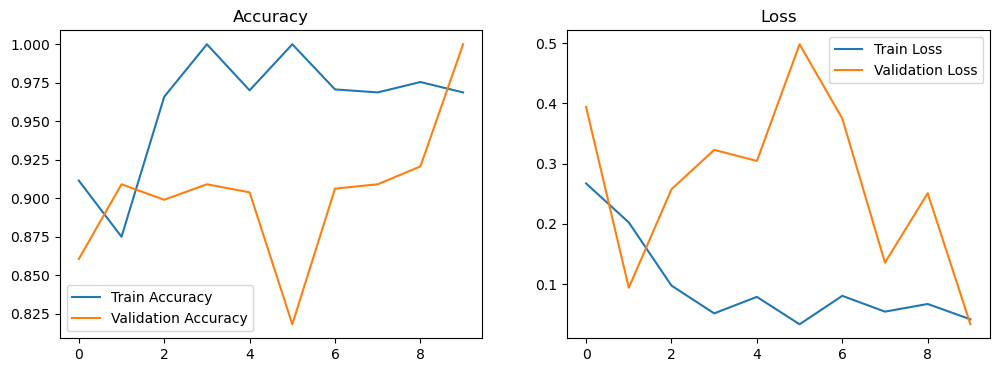

In [13]:

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


## AUC-ROC

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


fpr, tpr, _ = roc_curve(y_val,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


NameError: name 'y_val' is not defined

NameError: name 'model' is not defined